In [2]:
# for seaborn issue
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

mpl.rcParams['figure.figsize'] = (12, 8)

train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
macro = pd.read_csv('../Data/macro.csv')

%matplotlib inline

In [3]:
combine = pd.concat([train.drop(['price_doc'], 1), test], ignore_index=True)

In [4]:
combine['timestamp']

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
5        2011-09-06
6        2011-09-08
7        2011-09-09
8        2011-09-10
9        2011-09-13
10       2011-09-16
11       2011-09-16
12       2011-09-17
13       2011-09-19
14       2011-09-19
15       2011-09-20
16       2011-09-20
17       2011-09-20
18       2011-09-22
19       2011-09-22
20       2011-09-22
21       2011-09-22
22       2011-09-23
23       2011-09-23
24       2011-09-23
25       2011-09-24
26       2011-09-26
27       2011-09-26
28       2011-09-26
29       2011-09-27
            ...    
38103    2016-05-20
38104    2016-05-20
38105    2016-05-20
38106    2016-05-20
38107    2016-05-21
38108    2016-05-21
38109    2016-05-21
38110    2016-05-21
38111    2016-05-23
38112    2016-05-23
38113    2016-05-23
38114    2016-05-23
38115    2016-05-23
38116    2016-05-23
38117    2016-05-23
38118    2016-05-23
38119    2016-05-23
38120    2016-05-24
38121    2016-05-24


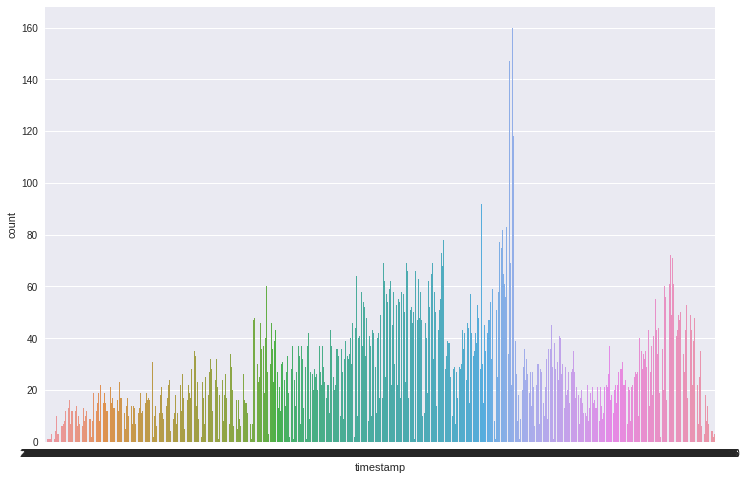

In [5]:
plt.figure(figsize=(12,8))
sns.countplot(x='timestamp', data=combine)

In [4]:
combine['trans_year'] = combine['timestamp'].apply(lambda x: int(x[:4]))
combine['trans_month'] = combine['timestamp'].apply(lambda x: int(x[5:7]))
combine['trans_day'] = combine['timestamp'].apply(lambda x: int(x[8:]))

In [7]:
combine['trans_day']

0        20
1        23
2        27
3         1
4         5
5         6
6         8
7         9
8        10
9        13
10       16
11       16
12       17
13       19
14       19
15       20
16       20
17       20
18       22
19       22
20       22
21       22
22       23
23       23
24       23
25       24
26       26
27       26
28       26
29       27
         ..
38103    20
38104    20
38105    20
38106    20
38107    21
38108    21
38109    21
38110    21
38111    23
38112    23
38113    23
38114    23
38115    23
38116    23
38117    23
38118    23
38119    23
38120    24
38121    24
38122    24
38123    24
38124    25
38125    25
38126    25
38127    26
38128    26
38129    28
38130    30
38131    30
38132    30
Name: trans_day, Length: 38133, dtype: int64

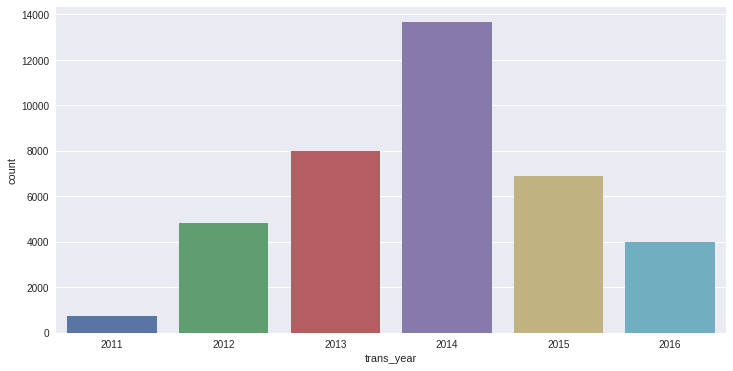

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x='trans_year', data=combine)

In [9]:
combine['timestamp'].value_counts().sort_values(ascending=False).head()

2014-12-16    160
2014-12-09    147
2014-06-30    133
2014-12-18    118
2014-11-25     93
Name: timestamp, dtype: int64

In [10]:
combine['timestamp'].sort_values().iloc[-1]

'2016-05-30'

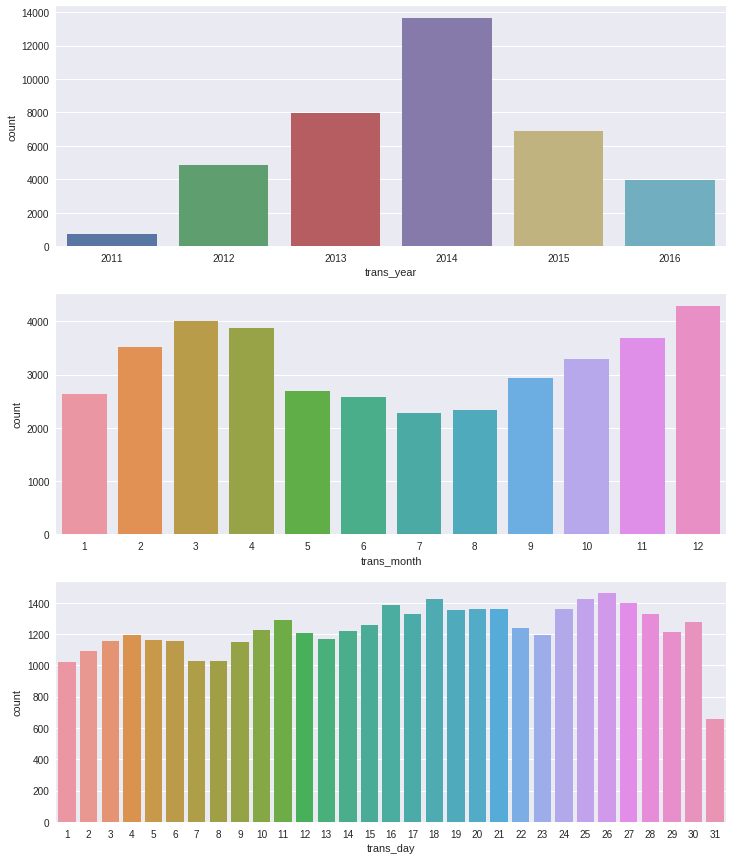

In [11]:
plt.figure(figsize=(12,15))
plt.subplot(311)
sns.countplot(x='trans_year', data=combine)
plt.subplot(312)
sns.countplot(x='trans_month', data=combine)
plt.subplot(313)
sns.countplot(x='trans_day', data=combine)

In [34]:
np.sort(combine['max_floor'].dropna().unique())

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   44.,   45.,
         47.,   48.,   57.,   99.,  117.])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

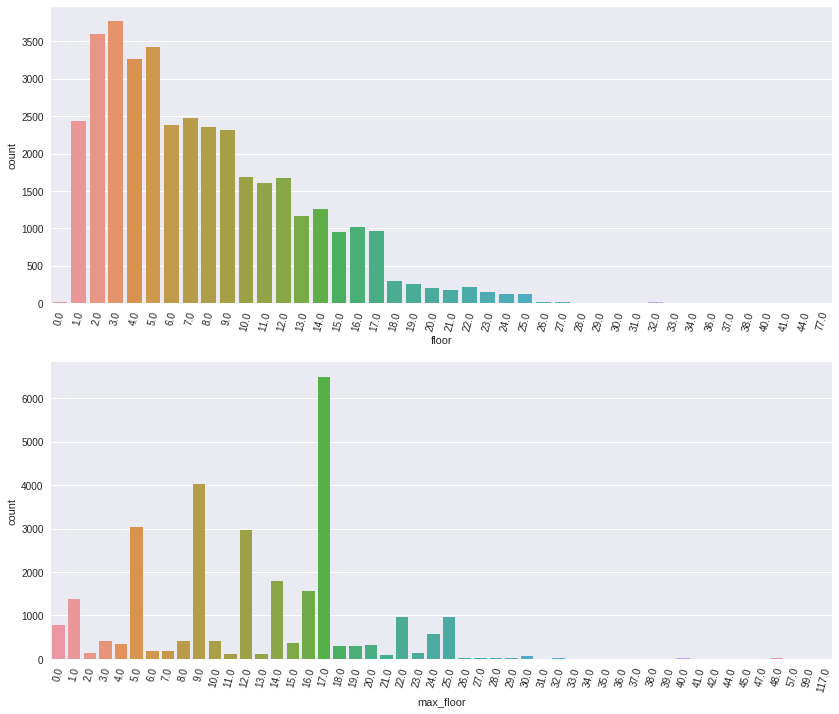

In [43]:
plt.figure(figsize=(14,12))
plt.subplot(211)
sns.countplot(x='floor', data=combine)
plt.xticks(rotation=75)
plt.subplot(212)
sns.countplot(x='max_floor', data=combine)
plt.xticks(rotation=75)

In [47]:
plt.figure(figsize=(12,8))plt.figure(figsize=(12,8))
sns.countplot(x='floor', data=combine)
plt.xticks(rotation=75)

SyntaxError: invalid syntax (<ipython-input-47-e972cd5bee8f>, line 1)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

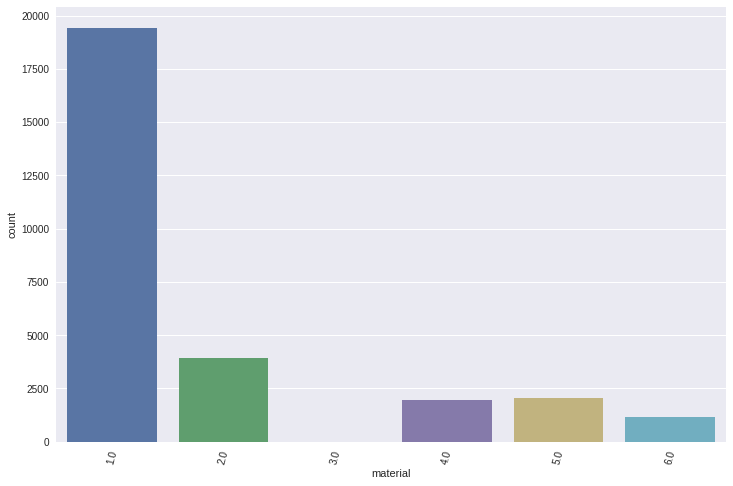

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(x='material', data=combine)
plt.xticks(rotation=75)

In [10]:
combine[combine['material'] == 3][['id', 'material']]

,id,material
24715,24718,3.0
36780,36783,3.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126]),
 <a list of 127 Text xticklabel objects>)

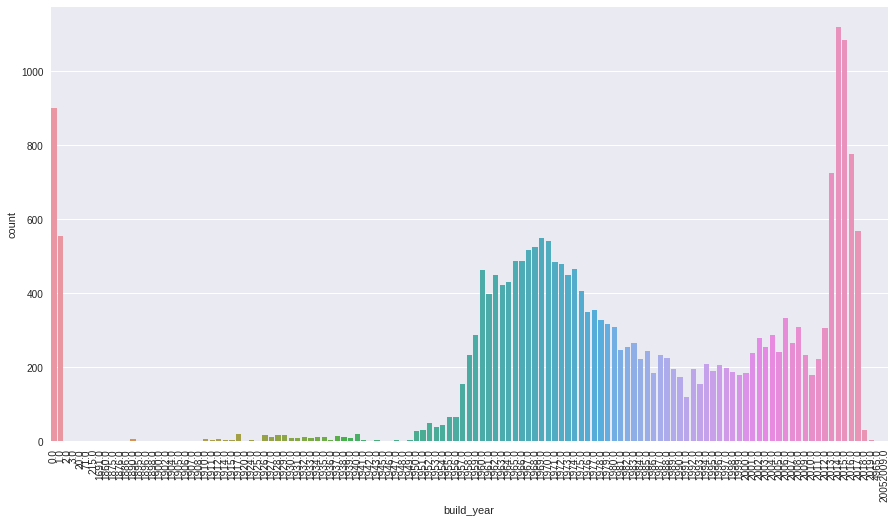

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x='build_year', data=combine)
plt.xticks(rotation=90)

In [32]:
combine[combine['build_year'] < 1900]['build_year'].value_counts().sort_index()

0.0       899
1.0       555
2.0         1
3.0         2
20.0        1
71.0        1
215.0       2
1691.0      1
1860.0      2
1875.0      1
1876.0      1
1886.0      1
1890.0      7
1895.0      2
1896.0      2
1898.0      1
Name: build_year, dtype: int64

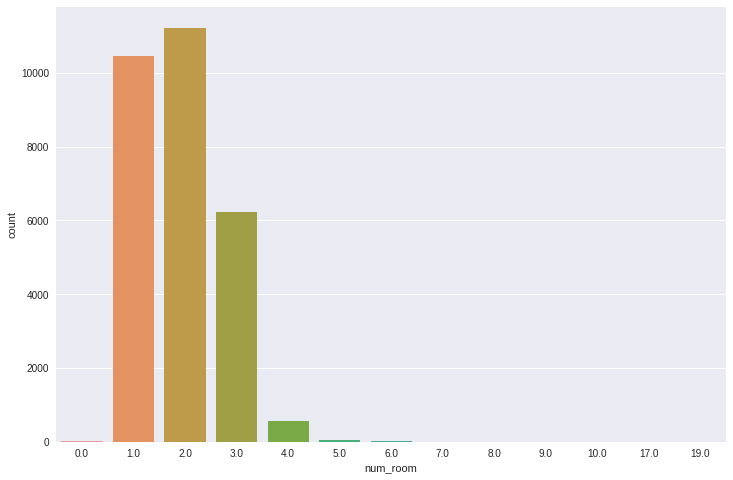

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x='num_room', data=combine)

In [34]:
combine['num_room'].value_counts()

2.0     11229
1.0     10457
3.0      6229
4.0       551
5.0        59
0.0        14
6.0        10
7.0         3
8.0         3
10.0        2
19.0        2
17.0        1
9.0         1
Name: num_room, dtype: int64

In [45]:
combine['state'].value_counts()

2.0     8506
3.0     7703
1.0     7121
4.0      549
33.0       1
Name: state, dtype: int64

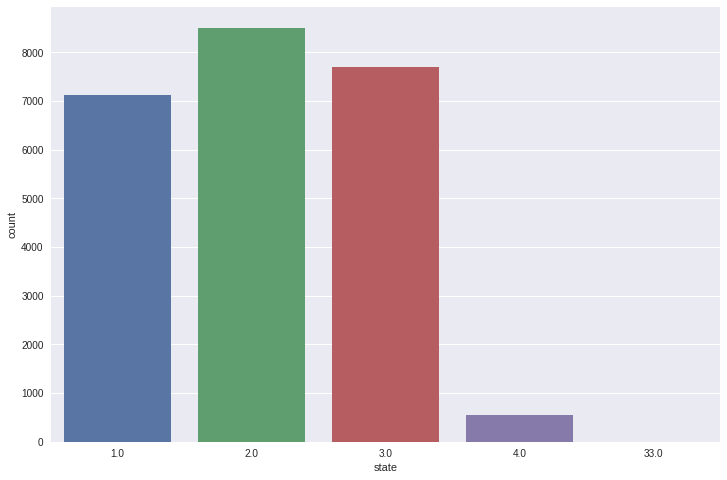

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(x='state', data=combine)

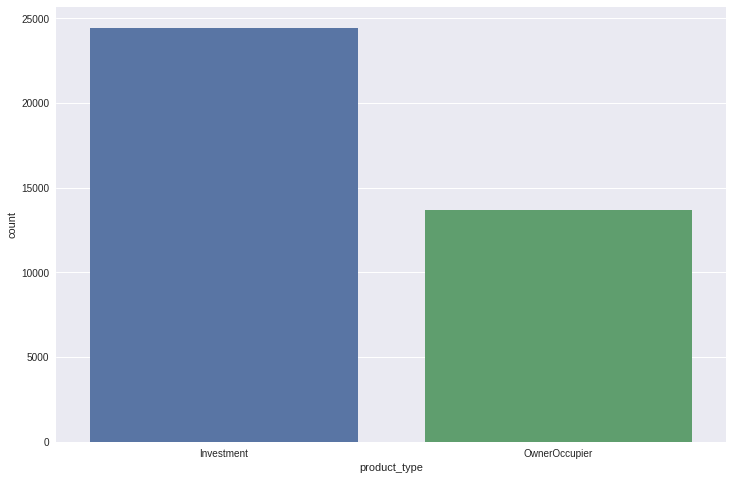

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(x='product_type', data=combine)

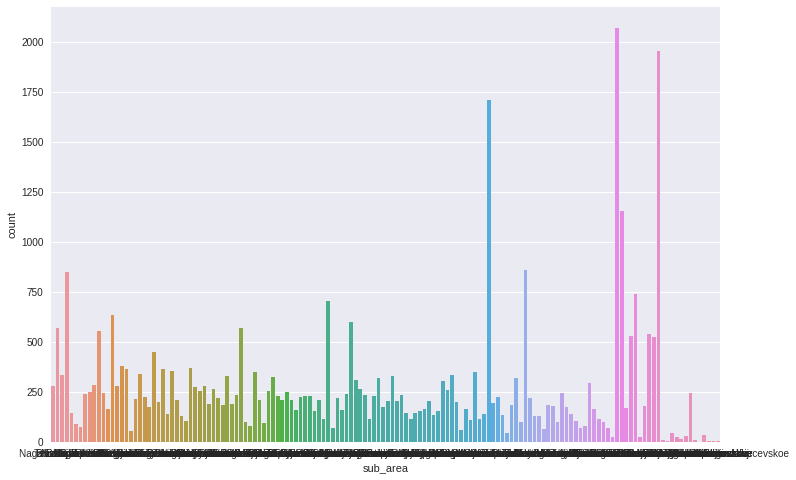

In [48]:
plt.figure(figsize=(12,8))
sns.countplot(x='sub_area', data=combine)

In [49]:
combine['sub_area'].unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", 'Mitino',
       'Basmannoe', 'Nizhegorodskoe', "Sokol'niki", 'Koptevo', 'Kuncevo',
       'Kosino-Uhtomskoe', 'Zapadnoe Degunino', 'Presnenskoe', 'Lefortovo',
       "Mar'ino", "Kuz'minki", 'Nagornoe', "Gol'janovo", 'Vnukovo',
       'Juzhnoe Tushino', 'Severnoe Tushino', "Chertanovo Central'noe",
       'Fili Davydkovo', 'Otradnoe', 'Novo-Peredelkino', 'Bogorodskoe',
       'Jaroslavskoe', 'Strogino', 'Hovrino', "Moskvorech'e-Saburovo",
       'Staroe Krjukovo', 'Ljublino', 'Caricyno', 'Veshnjaki',
       'Danilovskoe', 'Preobrazhenskoe', "Kon'kovo", 'Brateevo',
       'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino', 'Donskoe',
       'Novogireevo', 'Juzhnoe Butovo', 'Sokol', 'Kurkino', 'Izmajlovo',
       'Severnoe Medvedkovo', 'Rostokino', 'Orehovo-Borisovo Severnoe',
       'Ochakovo-Matveevskoe', 'Taganskoe', 'Dmitrovskoe',
       'Orehovo-Borisovo Juzhnoe', 'Teplyj Stan', 'Babushkinskoe',
       'Pokrovskoe Streshnevo', 'Obruc

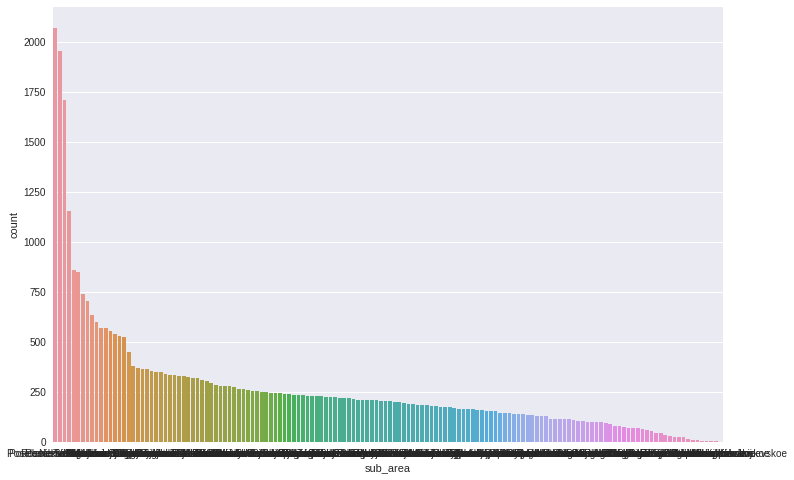

In [63]:
rank = combine['sub_area'].value_counts().index
plt.figure(figsize=(12,8))
sns.countplot(x='sub_area', data=combine, order=rank)

In [60]:
combine.groupby('sub_area')['id'].count().sort_values(ascending=False).index

Index(['Poselenie Sosenskoe', 'Poselenie Vnukovskoe', 'Nekrasovka',
       'Poselenie Moskovskij', 'Tverskoe', 'Mitino', 'Poselenie Voskresenskoe',
       'Solncevo', 'Mar'ino', 'Krjukovo',
       ...
       'Poselenie Kokoshkino', 'Arbat', 'Vostochnoe', 'Poselenie Voronovskoe',
       'Poselenie Marushkinskoe', 'Poselenie Shhapovskoe', 'Molzhaninovskoe',
       'Poselenie Kievskij', 'Poselenie Mihajlovo-Jarcevskoe',
       'Poselenie Klenovskoe'],
      dtype='object', name='sub_area', length=146)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

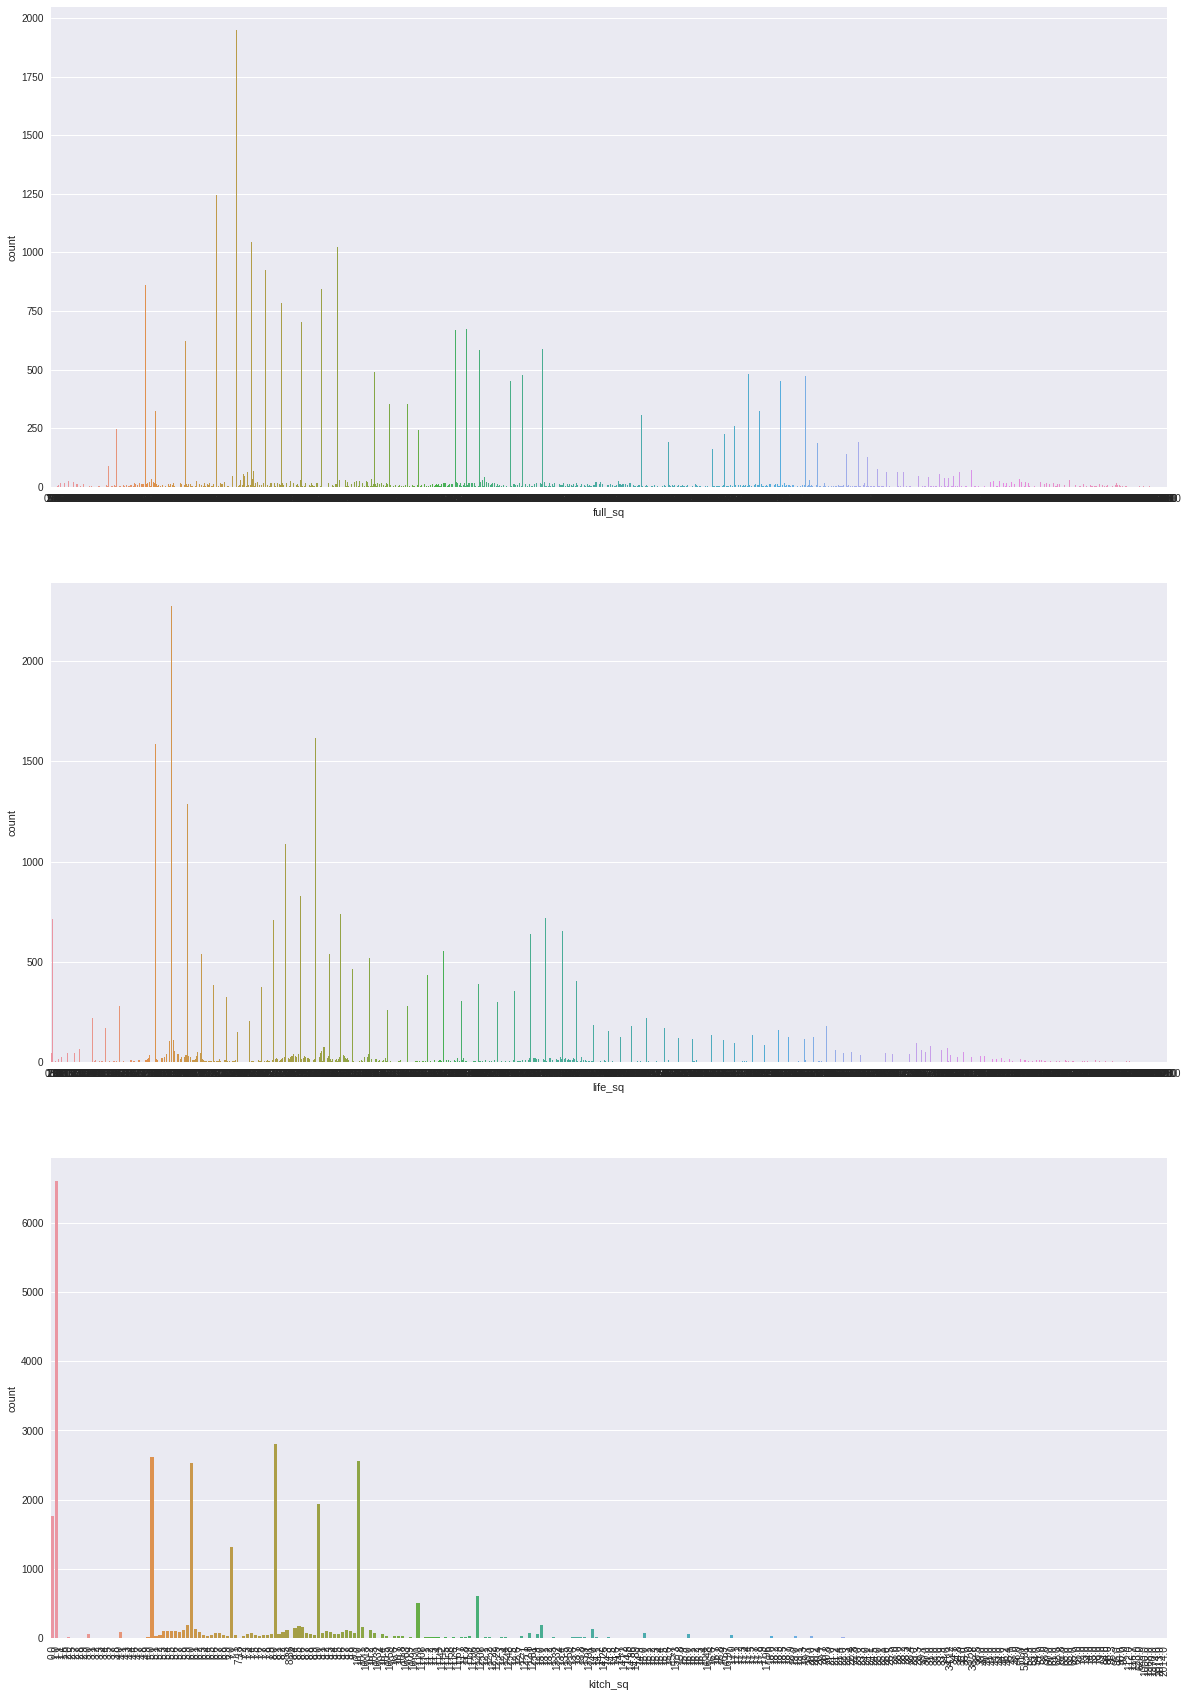

In [68]:
plt.figure(figsize=(20,30))
plt.subplot(311)
sns.countplot('full_sq', data=combine)
plt.subplot(312)
sns.countplot('life_sq', data=combine)
plt.subplot(313)
sns.countplot('kitch_sq', data=combine)
plt.xticks(rotation=90)

In [7]:
def plot_feat(feat):
    plt.figure(figsize=(12,8))
    sns.countplot(x=feat, data=combine)
#     if(combine[feat].nunique() > 10):
#         plt.xticks(rotation = 75)

In [ ]:
for col in combine.columns.drop(['id', 'full_sq', 'life_sq', 'kitch_sq', 'floor', 'max_floor', 'timestamp', 'build_year']):
    plot_feat(col)